# Project Tasks:
### Task 1: Regression discontinuity: banking recovery

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("bank_data.csv")
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


### Graphical exploratory data analysis

pt.1)The bank has different recovery strategies at thresholds like $1000, $2000, $3000 and $5000.
     Higher the Expected Recovery Amount,the more effort the bank puts into contacting the customer.
     The main Focus on the First Transition (Level 0 to Level 1).

pt.2)We're interested in the transition between Level 0 and Level 1, particularly when Expected Recovery Amounts are between $0      and $2000.
     The transition happens at $1000, separating Level 0 (up to $1000) and Level 1 ($1001 to $2000).
     
     Level 0: Expected recovery amounts >$0 and <=$1000
     Level 1: Expected recovery amounts >$1000 and <=$2000

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

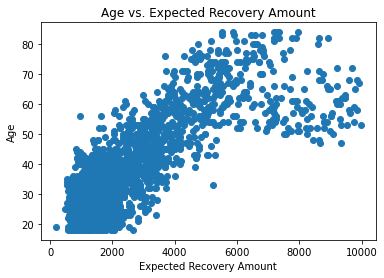

In [4]:
plt.scatter(df['expected_recovery_amount'], df['age'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Age vs. Expected Recovery Amount')
plt.show()

### Statistical test: age vs. expected recovery amount

In [5]:
## I need to import some important package "scipy" to find some statistical esult from the dataset.
from scipy.stats import ttest_ind

In [6]:
above_1000 = df[df['expected_recovery_amount'] > 1000]['age']
below_1000 = df[df['expected_recovery_amount'] <= 1000]['age']

t_stat, p_value = ttest_ind(above_1000, below_1000)
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')


T-statistic: 13.759810322222165
p-value: 4.071778578392043e-41


Here,P-Value is extremely small. Hence, it strongly suggests the evidence against the null hypothesis.i,e  there is a significant difference in age between customers with Expected Recovery Amount above $1000 and those below $1000.

### Statistical test: sex vs. expected recovery amount

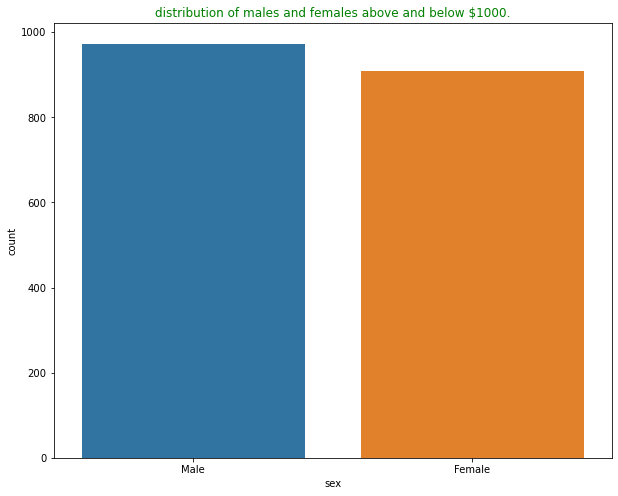

In [7]:
above_1000_sex = df[df['expected_recovery_amount'] > 1000]['sex']
below_1000_sex = df[df['expected_recovery_amount'] <= 1000]['sex']

plt.figure(figsize=(10,8))
sns.countplot(x='sex', data=df)
plt.title('distribution of males and females above and below $1000.',color='g')
plt.show()



In [8]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['sex'], df['expected_recovery_amount'] > 1000)

# Chi-square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2_stat}')
print(f'p-value: {p_value}')


Chi-square statistic: 2.1768676619404688
p-value: 0.14009934427173568


Here,p-value is greater than 0.05,hence we can say that there is not much significant difference in the distribution of males and females above and below $1000. But as per visualization above there is small difference in the distribution.

There is not much evidence to conclude a significant difference because of larger p-value. Still i can claim to be a significant change in the percentage of customers.


### Task 2: Exploratory Graphical Analysis : Recovery Amount

Develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between $900 to $1100. This range covers Levels 0 and 1. A key question is whether or not we see a discontinuity (jump) around the $1000 threshold.

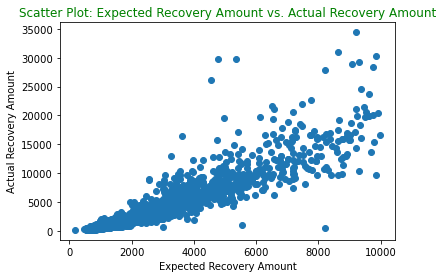

In [9]:

plt.scatter(df['expected_recovery_amount'], df['actual_recovery_amount'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Scatter Plot: Expected Recovery Amount vs. Actual Recovery Amount',color='g')
plt.show()


### Statistical analysis: recovery amount

In [10]:
#  actual recovery amount above and below $1000 threshold

above_1000_recovery = df[df['expected_recovery_amount'] > 1000]['actual_recovery_amount']
below_1000_recovery = df[df['expected_recovery_amount'] <= 1000]['actual_recovery_amount']


In [11]:

from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(above_1000_recovery, below_1000_recovery)
print(f'Mann-Whitney U statistic: {statistic}, p-value: {p_value}')


Mann-Whitney U statistic: 397788.0, p-value: 1.1299595152934939e-133


Since, p-value is very large.So, we can't say is there a significant difference in actual recovery amounts above and below $1000.

### Task 3: Regression Modeling

### No Threshold

In [12]:
import statsmodels.api as sm

# linear regression model with no threshold

X = sm.add_constant(df['expected_recovery_amount'])
y = df['actual_recovery_amount']

model_with_no_threshold = sm.OLS(y, X).fit()
model_with_no_threshold.summary()

C:\Users\Pranshu\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                            14:17:22   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1650.4994     76.506    -21.573      0.000   -1800.545   -1500.454
expected_recovery_amount     2.0477      0.022     91.530      0.000       2.004       2.092
==============================================================================
Omnibus:                     1477.262   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77458.302
Skew:                           3.224   Prob(JB):                         0.00
Kurtosis:                      33.761   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Along with otheres the value of R-Squared is 81% 
81% of the variability suggests a strong relationship between the two variables.

p-value<0.05, it suggests that the relationship is statistically significant.

The linear regression model suggests a strong relationship between the expected recovery amount and the actual recovery amount. Approximately 81% of the variability in actual recovery amounts can be explained by changes in the expected recovery amount. The coefficient for 'expected_recovery_amount'=2.0477.
The p-value for this coefficient is 0.00 suggesting that the relationship is statistically significant.

### with True Threshold:

In [13]:
# Adding true threshold i,e more than $1000

df['true_threshold'] = (df['expected_recovery_amount'] > 1000).astype(int)

# linear regression model with true threshold

X_with_threshold = sm.add_constant(df[['expected_recovery_amount', 'true_threshold']])
model_with_threshold = sm.OLS(y, X_with_threshold).fit()

model_with_threshold.summary()


C:\Users\Pranshu\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                            14:17:22   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1202.1199    125.637     -9.568      0.000   -1448.522    -955.718
expected_recovery_amount     2.0877      0.024     87.048      0.000       2.041       2.135
true_threshold            -643.3944    143.424     -4.486      0.000    -924.682    -362.107
==============================================================================
Omnibus:                     1473.046   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79375.610
Skew:                           3.198   Prob(JB):                         0.00
Kurtosis:                      34.166   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Along with otheres the value of R-Squared is 82% 
81% of the variability suggests a strong relationship between the two variables.

The linear regression model suggests a strong relationship between the expected recovery amount and the actual recovery amount. Approximately 81% of the variability in actual recovery amounts can be explained by changes in the expected recovery amount. The coefficient for 'expected_recovery_amount'= 2.0877.
stnd error for 'expected_recovery_amount' = 0.024
The p-value for this coefficient is nrgligible, suggests that the relationship is statistically significant.